TZ_Izpit_iz_vaj
Importi

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Navodila:


Tematika podatkov: Uporaba kreditnih kartic
Upravitelje bank skrbi, ker vse več strank opušča uporabo kreditnih kartic. Zato bi bilo koristno, če bi lahko iz obstoječih podatkov odkrili,
kdo namerava prenehati z uporabo kreditne kartice, da bi mu lahko ponudili boljši paket in ugodnosti, ter ga tako odvrnili od opustitve.
Podatki
V treh datotekah ( clientInfo.txt , clientActivity.xlsx , clientTransactions.csv ) se nahajajo podatki o klientih in njihovih
dejavnostih povezenih z uporabo kreditne kartice. Prva datoteka vsebuje splošne podatke o klientu, druga datoteka vsebuje podatke o
klientovih ativnostih povezanih z banko, tretja datoteka pa vsebuje podatke o klientovih transakcijah.
V pomoč pri razumevanju posameznih spremenljivk so vam lahko naslednji opisi ter vrsta podatkov (številski/kategorični
podatek):
Accaunt_Open - ali ima klient pri banki še odprt račun ('yes', 'no'): kategorični
Age - starost klienta: številski
Gender - spol klienta ('F'-ženski, 'M'-moški): kategorični
Family_Members - število vzdrževanih družinskih članov klienta: številski
Education - dosežena stopnja izobrazbe klienta ('Graduate','High School','Uneducated','College','Unknown'): kategorični
Status - kakšen je status razmerja klienta ('Married', 'Single', 'Divorced', 'Unknown'): kategorični
Income_Category - v katero kategorijo sodi klient glede na prihodek ('average', 'very low', 'high', 'low', 'very high', 'Unknown'):
kategorični
Card_Category - kateri tip kartice klient uporablja ('Blue', 'Silver', 'Gold', 'Platinum'): kategorični
Member - koliko mesecev je že klient pri izbrani banki: številski
NumServices - koliko različnih storitev banke klient uporablja: številski
Months_Inactive - koliko mesecev v zadnjem letu je bil klient neaktiven: številski
Contacts_Count - kolikokrat je klient v zadnjem letu kontaktiral banko: številski
Credit_Limit - kakšen limit ima klient na kreditni kartici: številski
MinMonthBalance - minimalno mesečno stanje klienta: številski
ChangeInTransaction - sprememba v velikosti transakcij med začetkom in koncem leta: številski
TransAmount - skupna vsota transakcij v zadnjem letu: številski
TransCount - število transakcij opravljenih v zanjem letu: številski


 Izpit iz vaj (16. 1. 2024)
V dataframe preberite vse tri datoteke s podatki: clientInfo.txt , clientActivity.xlsx in clientTransactions.csv .
 


In [3]:
df_client_info=pd.read_csv("clientInfo.txt",sep=" ", index_col=0)
df_client_activity=pd.read_excel("clientActivity.xlsx",index_col=0)
df_client_transactions=pd.read_csv("clientTransactions.csv",sep=";",index_col=0)
df_client_transactions.head()

#df1=pd.read_csv("clientTransactions.csv", sep=";", index_col=0)
#df2=pd.read_csv("clientInfo.txt", sep=" ", index_col=0)
#df3=pd.read_excel("clientActivity.xlsx", sheet_name=0, index_col=0)


,Credit_Limit,MinMonthBalance,ChangeInTransaction,TransAmount,TransCount
ID,,,,,
768805383,12691.0,777,1.335,1144.0,42
818770008,8256.0,864,1.541,1291.0,33
713982108,3418.0,0,2.594,1887.0,20
769911858,3313.0,2517,1.405,1171.0,20
709106358,4716.0,0,2.175,816.0,28


Vse prebrane
podatke iz datotek nato združite v en dataframe, glede na ID klienta. Indeks stolpec naj bo poimenovan ID_KLIENT.


In [4]:
#data=pd.concat([df_client_info,df_client_activity,df_client_transactions])
#data.head()

data=pd.merge(df_client_info,df_client_activity, left_index=True, right_index=True )

data=pd.merge(data,df_client_transactions, left_index=True, right_index=True )
data.index.name="ID_KLIENT"
print(data.index)
data.head()

Index([768805383, 818770008, 713982108, 769911858, 709106358, 713061558,
       810347208, 818906208, 710930508, 719661558,
       ...
       712503408, 713755458, 716893683, 710841183, 713899383, 772366833,
       710638233, 716506083, 717406983, 714337233],
      dtype='int64', name='ID_KLIENT', length=10127)


,Accaunt_Open,Age,Gender,Family_Members,Education,Status,Income_Category,Card_Category,Member,NumServices,Months_Inactive,Contacts_Count,Credit_Limit,MinMonthBalance,ChangeInTransaction,TransAmount,TransCount
ID_KLIENT,,,,,,,,,,,,,,,,,
768805383,yes,45,M,3,High School,Married,average,Blue,39,5,1,3.0,12691.0,777,1.335,1144.0,42
818770008,yes,49,F,5,Graduate,Single,very low,Blue,44,6,1,2.0,8256.0,864,1.541,1291.0,33
713982108,yes,51,M,3,Graduate,Married,high,Blue,36,4,1,NaN,3418.0,0,2.594,1887.0,20
769911858,yes,40,F,4,High School,Unknown,very low,Blue,34,3,4,1.0,3313.0,2517,1.405,1171.0,20
709106358,yes,40,M,3,Uneducated,Married,average,Blue,21,5,1,NaN,4716.0,0,2.175,816.0,28


Na dva(!) različna načina izpišite zadnje 3 vrstice tega združenega datafram-a.
izpišite koliko stolpcev in vrstic je v združenem datafram-u.



In [5]:
print("head")
print(data.iloc[-3:])#brez printa se ne pokaze
print("tail")
print(data.tail(3))

head
          Accaunt_Open  Age Gender  Family_Members    Education   Status  \
ID_KLIENT                                                                  
716506083           no   44      F               1  High School  Married   
717406983           no   30      M               2     Graduate  Unknown   
714337233           no   43      F               2     Graduate  Married   

          Income_Category Card_Category  Member  NumServices  Months_Inactive  \
ID_KLIENT                                                                       
716506083        very low          Blue      36            5                3   
717406983             low          Blue      36            4                3   
714337233        very low        Silver      25            6                2   

           Contacts_Count  Credit_Limit  MinMonthBalance  ChangeInTransaction  \
ID_KLIENT                                                                       
716506083             4.0        5409.0       

In [6]:
print("-------------------------------------> iloc")
print(data.iloc[0:3])
print("-------------------------------------> head")
print(data.head(3))


-------------------------------------> iloc
          Accaunt_Open  Age Gender  Family_Members    Education   Status  \
ID_KLIENT                                                                  
768805383          yes   45      M               3  High School  Married   
818770008          yes   49      F               5     Graduate   Single   
713982108          yes   51      M               3     Graduate  Married   

          Income_Category Card_Category  Member  NumServices  Months_Inactive  \
ID_KLIENT                                                                       
768805383         average          Blue      39            5                1   
818770008        very low          Blue      44            6                1   
713982108            high          Blue      36            4                1   

           Contacts_Count  Credit_Limit  MinMonthBalance  ChangeInTransaction  \
ID_KLIENT                                                                       
7688053

Izpišite vse podatke klienta, ki ima ID 714133158.


In [7]:
print(data.loc[[714133158]])

          Accaunt_Open  Age Gender  Family_Members Education  Status  \
ID_KLIENT                                                              
714133158          yes   59      F               1   College  Single   

          Income_Category Card_Category  Member  NumServices  Months_Inactive  \
ID_KLIENT                                                                       
714133158         Unknown          Blue      36            2                3   

           Contacts_Count  Credit_Limit  MinMonthBalance  ChangeInTransaction  \
ID_KLIENT                                                                       
714133158             3.0        4224.0             1305                0.852   

           TransAmount  TransCount  
ID_KLIENT                           
714133158       1152.0          31  


Izpišite prvih pet vrednosti stolpcev za četrto vrstico v datafram-u.


In [8]:
print(data.iloc[3,:5])

Accaunt_Open              yes
Age                        40
Gender                      F
Family_Members              4
Education         High School
Name: 769911858, dtype: object


Izpišite koliko je posameznih unikatnih vrednosti v stolpcu Card Category.
 Naloga 1 (13 T)

In [9]:
print("izpis vrednosti im pripadajočih tipov")
print(data["Card_Category"].unique())
print("goli izpis unikatnih vrednosti")
data["Card_Category"].nunique()

izpis vrednosti im pripadajočih tipov
['Blue' 'Gold' 'Silver' 'Platinum' nan]
goli izpis unikatnih vrednosti


4

Izrišite graf korelacij med vsemi številskimi stolpci.


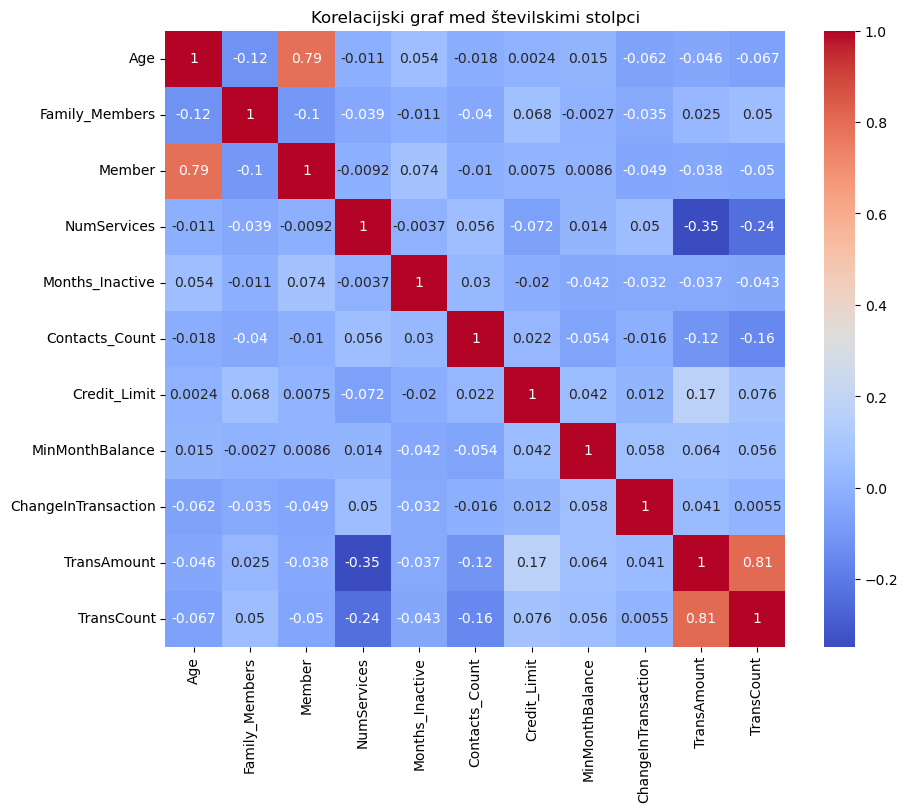

In [10]:
import numpy as np

numeric_cols = data.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelacijski graf med številskimi stolpci')
plt.show()

<Axes: >

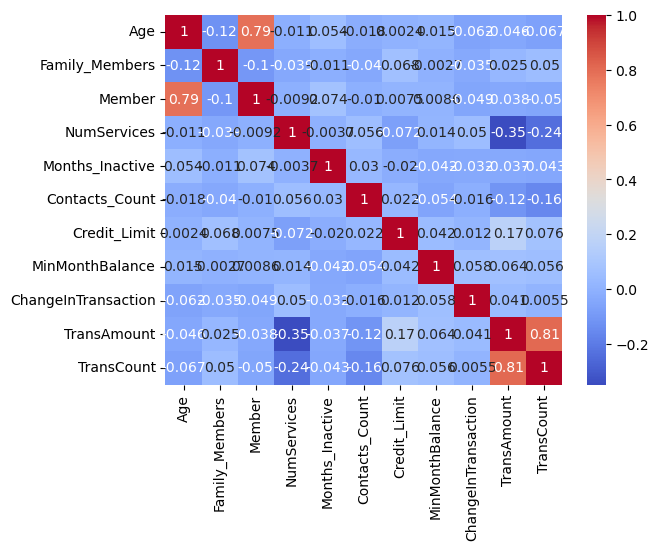

In [11]:
numeric_cols = data.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

Izrišite graf, ki bo prikazoval koliko klientov je v kakšni vrsti razmerja (poročen, ločen, ...).


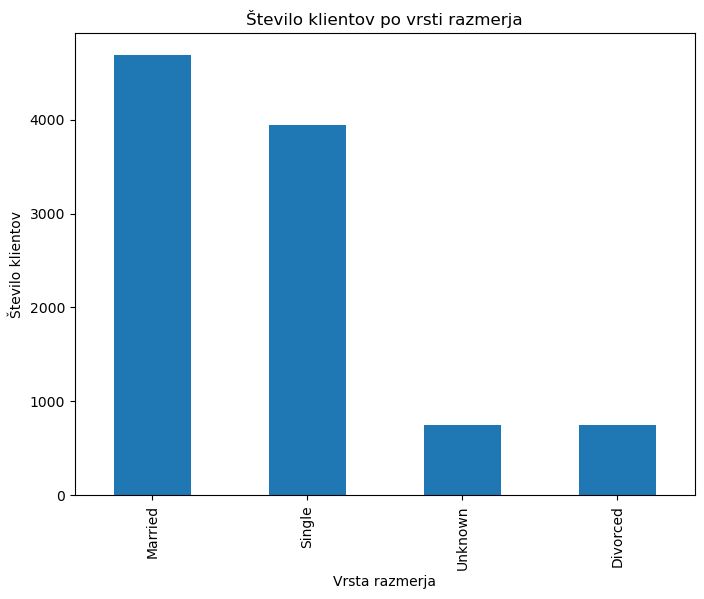

In [12]:
plt.figure(figsize=(8, 6))
data['Status'].value_counts().plot(kind='bar')
plt.title('Število klientov po vrsti razmerja')
plt.xlabel('Vrsta razmerja')
plt.ylabel('Število klientov')
plt.show()

<Axes: xlabel='Accaunt_Open'>

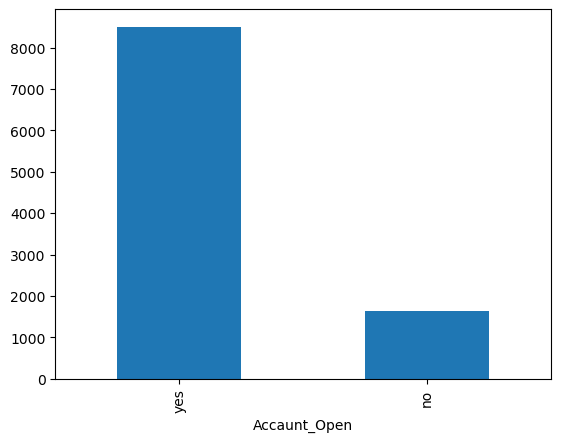

In [13]:
data['Accaunt_Open'].value_counts().plot(kind='bar')

Izrišite graf, ki bo prikazoval povprečno koliko mesecev je že klient pri izbrani banki, glede na vrsto kartice, ki jo ima
(Card_Category). Upoštevajte samo kliente, ki imajo še vedno odprt račun.


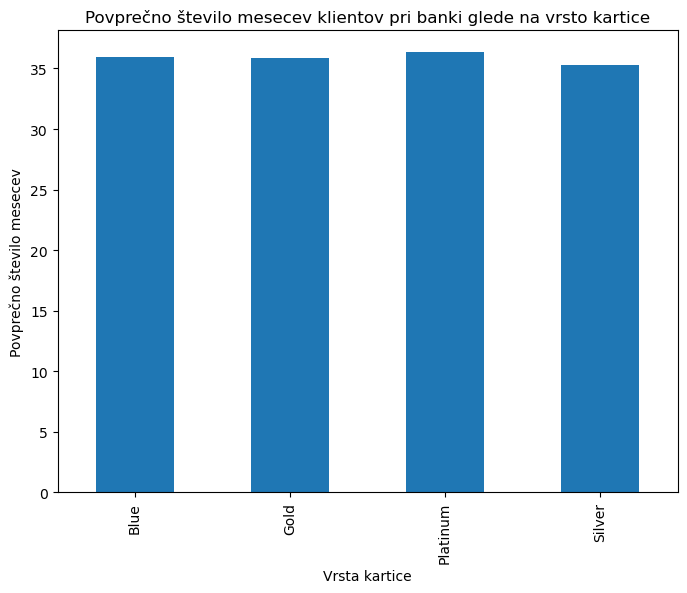

In [14]:
active_clients = data[data['Accaunt_Open'] == 'yes']
avg_months_by_card_type = active_clients.groupby('Card_Category')['Member'].mean()

plt.figure(figsize=(8, 6))
avg_months_by_card_type.plot(kind='bar')
plt.title('Povprečno število mesecev klientov pri banki glede na vrsto kartice')
plt.xlabel('Vrsta kartice')
plt.ylabel('Povprečno število mesecev')
plt.show()

Kakšen je povprečen limit klientov na kreditni kartici glede na doseženo stopnjo izobrazbe? Povprečen limit zaokrožite na celo
število in ga sortirajte od najmanjšega do največjega.


<Axes: xlabel='Education'>

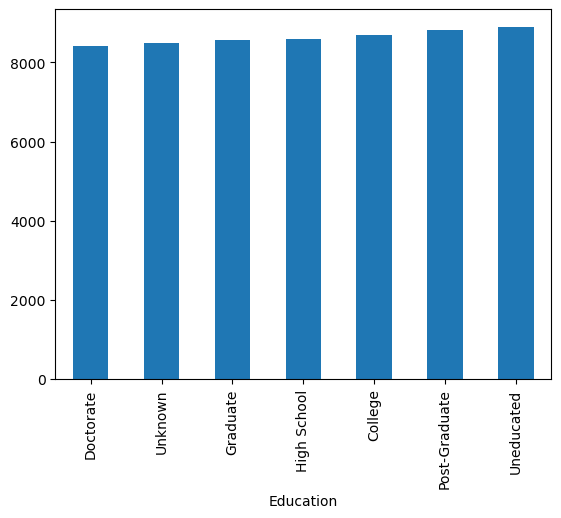

In [15]:
avg_credit_limit_by_education = data.groupby('Education')['Credit_Limit'].mean().round().sort_values()
avg_credit_limit_by_education.plot(kind="bar")

Koliko klientov ima doktorat ali univerzitetno izobrazbo?


In [16]:
num_clients_high_education = data[data['Education'].isin(['Doctorate', 'University'])].shape[0]
print(num_clients_high_education)

451


Koliko klientov je v zadnjem letu kontaktiralo banko večkrat, kot so to v povprečju storili ostali klienti?
 Naloga 2 (20 T)

In [17]:
avg_contacts = data['Contacts_Count'].mean()
more_than_avg_contacts = data[data['Contacts_Count'] > avg_contacts].shape[0]

avg_credit_limit_by_education, num_clients_high_education, more_than_avg_contacts

(Education
 Doctorate        8413.0
 Unknown          8496.0
 Graduate         8557.0
 High School      8603.0
 College          8685.0
 Post-Graduate    8821.0
 Uneducated       8900.0
 Name: Credit_Limit, dtype: float64,
 451,
 5002)

Izpišite koliko je manjkajočih podatkov v posameznih stolpcih.
Nato manjkajoče podatke iz stolpcev zapolnite s sledečo strategijo:
Contacts_Count zapolnite s povprečno vrednostjo stolpca
Card_Category zapolnite z najpogosteje pojavljeno vrednostjo stolpca
Credit_Limit zapolnite z vrednostjo 0
TransAmount zapolnite tako da ChangeInTransaction pomnožite s 1000 (TA=CiTx1000).
Ponovno izpišite koliko je manjkajočih vrednosti samo za te štiri stolpce.
 Naloga 3 (5 T)

In [18]:
# Predpostavimo, da imamo že naložen DataFrame 'data'. Najprej preverimo manjkajoče podatke.
missing_values_before = data.isnull().sum()

# Zapolnitev manjkajočih podatkov za določene stolpce
# Contacts_Count: povprečna vrednost
data['Contacts_Count'].fillna(data['Contacts_Count'].mean(), inplace=True)

# Card_Category: najpogostejša vrednost
most_common_card_category = data['Card_Category'].mode()[0]
data['Card_Category'].fillna(most_common_card_category, inplace=True)

# Credit_Limit: zapolnite z 0
data['Credit_Limit'].fillna(0, inplace=True)

# TransAmount: zapolnite tako, da ChangeInTransaction pomnožite s 1000
# Predpostavljamo, da manjkajoče vrednosti za ChangeInTransaction ne obstajajo ali pa so že obdelane
data['TransAmount'].fillna(data['ChangeInTransaction'] * 1000, inplace=True)

# Ponovna preveritev manjkajočih vrednosti za te štiri stolpce
missing_values_after = data[['Contacts_Count', 'Card_Category', 'Credit_Limit', 'TransAmount']].isnull().sum()

missing_values_before[['Contacts_Count', 'Card_Category', 'Credit_Limit', 'TransAmount']], missing_values_after

(Contacts_Count    16
 Card_Category     20
 Credit_Limit       8
 TransAmount        6
 dtype: int64,
 Contacts_Count    0
 Card_Category     0
 Credit_Limit      0
 TransAmount       0
 dtype: int64)

Ustvarite dve kopiji datafram-a dfRegresija in dfKlasifikacija :
dfKlasifikacija je dataframe, ki ga boste uporabili za klasifikacijo, in sicer boste napovedovali ali ima klient pri banki še
odprt račun (Accaunt_Open).
dfRegresija je dataframe, ki ga boste uporabili za regresijo, in sicer boste napovedovali število transakcij (TransCount).
Podatke v obeh dataframih ustrezno predprocesirajte(!) - kategorične vrednosti pretvorite v dummy vrednosti, številske pa
standardizirajte.
Izpišite prvih 5 vrstic iz vsakega dataframa.
 Naloga 4 (10 T)

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Ustvarjanje kopij DataFrame za različne namene
dfKlasifikacija = data.copy()
dfRegresija = data.copy()

# Določanje stolpcev za predelavo
categorical_cols = dfKlasifikacija.select_dtypes(include=['object', 'category']).columns
numeric_cols = dfKlasifikacija.select_dtypes(include=['int64', 'float64']).columns.drop(['TransCount'])  # Izvzamemo TransCount za regresijo

# Predprocesiranje: OneHotEncoder za kategorične in StandardScaler za številske vrednosti
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Predprocesiranje za dfKlasifikacija
dfKlasifikacija_processed = preprocessor.fit_transform(dfKlasifikacija)
dfKlasifikacija = pd.DataFrame(dfKlasifikacija_processed, columns=preprocessor.get_feature_names_out())

# Za dfRegresija, izvzamemo 'TransCount' iz številskih stolpcev, saj ga napovedujemo
numeric_cols_regresija = numeric_cols  # Če je 'TransCount' že izvzet, ta korak ni potreben
preprocessor_regresija = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols_regresija),
        ('cat', OneHotEncoder(), categorical_cols)
    ])
dfRegresija_processed = preprocessor_regresija.fit_transform(dfRegresija)
dfRegresija = pd.DataFrame(dfRegresija_processed, columns=preprocessor_regresija.get_feature_names_out())

# Izpis prvih 5 vrstic vsakega DataFrame
dfKlasifikacija.head(), dfRegresija.head()


(   num__Age  num__Family_Members  num__Member  num__NumServices  \
 0 -0.165406             0.503368     0.384621          0.763943   
 1  0.333570             2.043199     1.010715          1.407306   
 2  0.583058             0.503368     0.008965          0.120579   
 3 -0.789126             1.273283    -0.241473         -0.522785   
 4 -0.789126             0.503368    -1.869317          0.763943   
 
    num__Months_Inactive  num__Contacts_Count  num__Credit_Limit  \
 0             -1.327136             0.490808           0.448150   
 1             -1.327136            -0.416756          -0.040110   
 2             -1.327136             0.000000          -0.572737   
 3              1.641478            -1.324321          -0.584297   
 4             -1.327136             0.000000          -0.429837   
 
    num__MinMonthBalance  num__ChangeInTransaction  num__TransAmount  ...  \
 0             -0.473422                  2.623494         -0.959506  ...   
 1             -0.366667  

Kot prvo boste s pomočjo klasifikacije poskušali napovedati ali bo nekdo pustil odprt račun ali ga bo zaprl (uporabite podatke iz
dfKlasifikacija ). Izhodni podatek je tako znan, iz vhodnih podatkov pa odstranite še 'MinMonthBalance' in 'Credit_Limit'. Ker ne vemo
kateri klasifikator bi bil tu najboljši preizkusite tri: naključni gozd, k-najbližjih sosedov in logistično regresijo.
Podatke razdelite na učno in testno množico s pomočjo stratificirane navzkrižne validacije s šestimi rezi. Za vsak algoritem merite
točnost njegove napovedi.
Izrišite graf, ki bo pregledno prikazoval povprečno točnost posameznega klasifikatorja.
 Naloga 5 (12 T)

c:\Users\jasar\ANACONDA3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


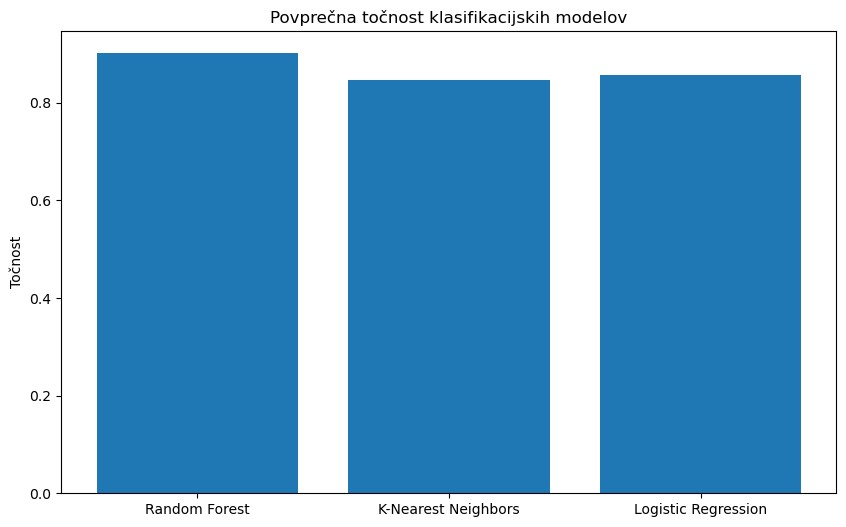

In [20]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Priprava podatkov (predpostavka: dfKlasifikacija že vsebuje predprocesirane podatke)
#print(dfKlasifikacija.columns)
X = dfKlasifikacija.drop(['cat__Accaunt_Open_no', 'cat__Accaunt_Open_yes', 'num__MinMonthBalance', 'num__Credit_Limit'], axis=1)
y = dfKlasifikacija['cat__Accaunt_Open_yes']  # Napovedujemo, ali bo račun odprt (yes)


# Inicializacija modelov
models = {
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Stratificirana navzkrižna validacija
cv = StratifiedKFold(n_splits=6)

# Shranjevanje povprečnih točnosti
model_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')        
    model_scores[name] = scores.mean()

# Vizualizacija rezultatov
plt.figure(figsize=(10, 6))
plt.bar(model_scores.keys(), model_scores.values())
plt.title('Povprečna točnost klasifikacijskih modelov')
plt.ylabel('Točnost')
plt.show()



In [21]:
#Test

X = dfKlasifikacija.drop(['cat__Accaunt_Open_no', 'cat__Accaunt_Open_yes', 'num__MinMonthBalance', 'num__Credit_Limit'], axis=1)
y = dfKlasifikacija['cat__Accaunt_Open_yes']

models={ "Random Forest": RandomForestClassifier()}


cv = StratifiedKFold(n_splits=6)


model_scores = {}

"""


for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    model_scores[name] = scores.mean()
"""
score=cross_val_score(RandomForestClassifier(),X,y,cv=cv,scoring="accuracy")
#plt.bar(model_scores.keys(), model_scores.values())
print(score)

[0.86255924 0.8992891  0.92239336 0.9271327  0.94194313 0.84410196]


Za algoritem, ki se je v nalogi 5 najbolje izkazal poiščite najboljše nastavitve parametrov s pomočjo naključnega iskanja
(RandomizedSearchCV), ki ga omejite na 10 iteracij. Poiskati morate najboljše vrednosti za vsaj dva različna parametra. Pri vsakem
parametru naj ima algoritem možnost izbirati vsaj med tremi vrednostmi. Vhodni in izhodni podatki, ter delitev na folde, naj ostane
enaka kot pri 5. nalogi.
Izpišite najboljšo doseženo točnost in vrednosti parametrov, ki so pripomogle k temu rezultatu.
 Naloga 6 (10 T)

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Nastavitve parametrov za RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300],  # Možne vrednosti za število dreves
    'max_depth': [10, 20, None]  # Možne vrednosti za maksimalno globino dreves
}

# Inicializacija RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_distributions,
    n_iter=10,  # Število iteracij iskanja
    cv=StratifiedKFold(n_splits=6),  # Uporaba stratificirane navzkrižne validacije
    scoring='accuracy',  # Merilo za ocenjevanje
    random_state=42  # Za reproducibilnost rezultatov
)

# Izvedba iskanja na podatkih
random_search.fit(X, y)

# Izpis najboljše dosežene točnosti in vrednosti parametrov
print("Najboljša točnost:", random_search.best_score_)
print("Najboljše vrednosti parametrov:", random_search.best_params_)


c:\Users\jasar\ANACONDA3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Najboljša točnost: 0.9042109838173338
Najboljše vrednosti parametrov: {'n_estimators': 100, 'max_depth': 20}


In [23]:
param_distributions = {
    'n_estimators': [100, 200, 300],  # Možne vrednosti za število dreves
    'max_depth': [10, 20, None]  # Možne vrednosti za maksimalno globino dreves
}




S pomočjo regresija poskusite napovedati število transakcij, ki jih bo klient opravil v enem letu (TransCount), za podatke pa uporabite
dataframe dfRegresija . Iz vhodnih podatkov izpustite tudi podatek NumServices. Model učite na 80% vseh podatkov. Naključno stanje
naj bo 789. Za regresor uporabite linearno regresijo.
Kako dobro se je naučil model ocenite s povprečno absolutno napako.
 Naloga 7 (10 T)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Priprava podatkov
X = dfRegresija.drop(['num__TransAmount', 'num__NumServices'], axis=1)  # Izpustimo ciljno spremenljivko in 'NumServices'
y = dfRegresija['num__TransAmount']  # Ciljna spremenljivka je 'num__TransAmount'

# Delitev na učno in testno množico
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=789)

# Učenje modela
model = LinearRegression()
model.fit(X_train, y_train)

# Napovedi na testni množici
y_pred = model.predict(X_test)

# Ocenjevanje modela
mae = mean_absolute_error(y_test, y_pred)
print(f"Povprečna absolutna napaka (MAE): {mae}")


Povprečna absolutna napaka (MAE): 0.5945316451534643






Za konec naredite še gručenje nad enakim datasetom, kot ste ga uporabili za regresijo. Podatke transformirajte s pomočjo PCA
dekompozicije. Kot algoritem gručenja uporabite Birch.
Da boste lažje določili optimalno število gruč, v katere boste delili podatke izrišite dendrogram in to število nato uporabite v
algoritmu gručenja.
Izrišite graf, v katerem prikažete transformirane podatke, ki so obarvani glede na gručo, v katero so razvrščeni.
 Naloga 8 (10 T)


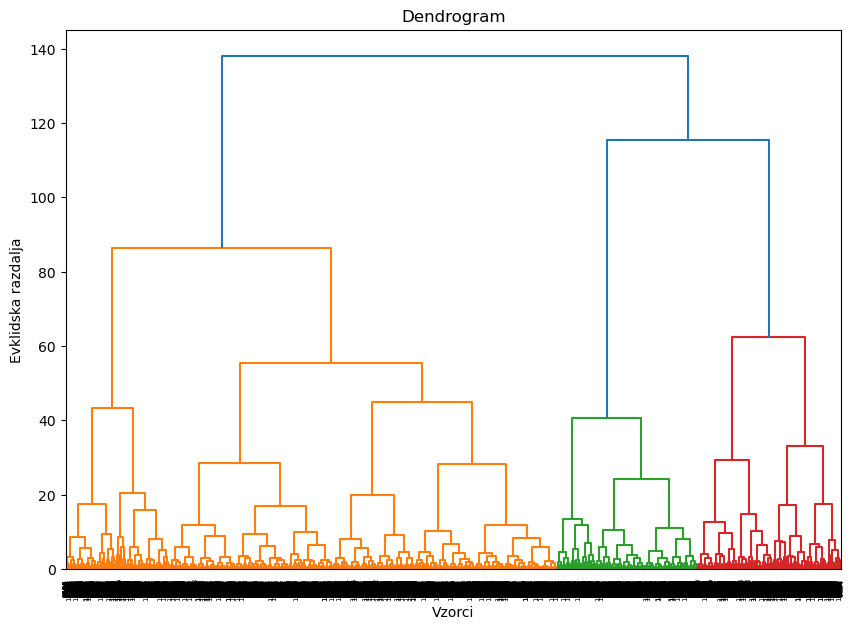

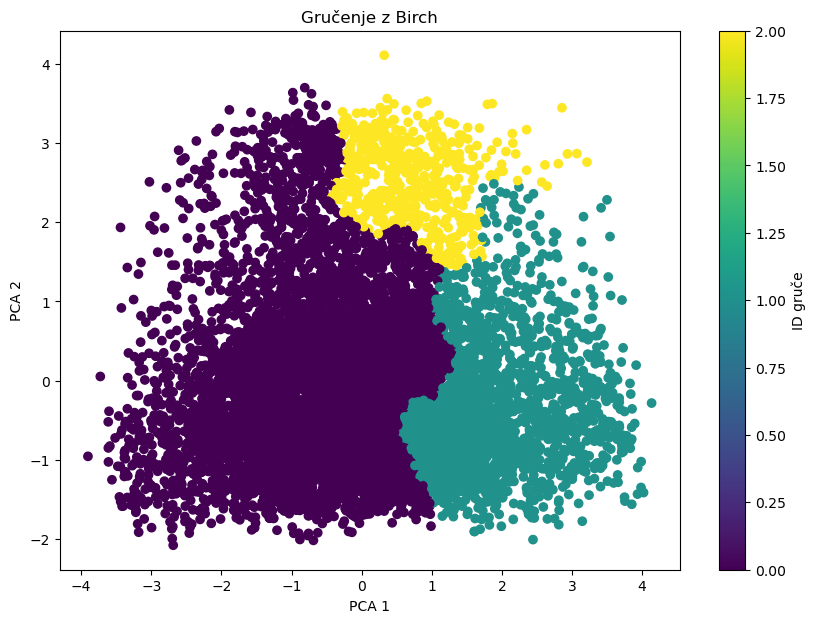

In [25]:
from sklearn.decomposition import PCA
from sklearn.cluster import Birch
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Predpostavimo, da je dfRegresija že pripravljen za uporabo
X = dfRegresija.drop(['num__TransAmount', 'num__NumServices'], axis=1)

# PCA dekompozicija za zmanjšanje dimenzionalnosti
pca = PCA(n_components=2)  # Zmanjšamo na 2 dimenziji za vizualizacijo
X_pca = pca.fit_transform(X)

# Izris dendrograma za določitev optimalnega števila gruč
Z = linkage(X_pca, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel('Vzorci')
plt.ylabel('Evklidska razdalja')
plt.show()

# Analiza dendrograma in določitev števila gruč
n_clusters = 3  # Predpostavka na podlagi vizualne analize dendrograma

# Gručenje z Birch
birch = Birch(n_clusters=n_clusters)
labels = birch.fit_predict(X_pca)

# Vizualizacija gruč
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('Gručenje z Birch')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='ID gruče')
plt.show()
